In [105]:
import os
import numpy as np
import muspy
from tqdm import tqdm
import config
import utils
import tarfile
import shutil
import collections
from matplotlib import pyplot as plt
import json
import tensorflow as tf
import pickle
import json
import pprint
import subprocess

config_string = "single_instruments_type"
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

conf = config.Config(config_string, ROOT_PATH)

In [106]:
lmd_matched = utils.get_dataset("lmd_matched", conf)

In [116]:
for song in lmd_matched:
    if len(song.time_signatures) > 4:
        original_song = song
        break

In [117]:
original_song.time_signatures

[TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4),
 TimeSignature(time=0, numerator=4, denominator=4)]

In [118]:
tmp_converted_song = utils.transform_representation(original_song, conf)
converted_song = utils.anti_tranform_representation(tmp_converted_song, conf)

In [23]:
original_song.tracks[0].notes[0]

Note(time=12960, pitch=35, duration=95, velocity=105)

In [89]:
# def list_notes(song: muspy.Music):
#     notes = np.zeros((100000, 4))
#     resolution = song.resolution
#     i=0
#     for track in song.tracks:
#         for note in track:
#             notes[i, :] = [note.time/resolution, note.duration/resolution, note.velocity, note.pitch]
#             i+=1

#     notes = notes[notes[:, 0].argsort(), :]
#     return notes

In [90]:
# note_list_original = list_notes(original_song)
# note_list_converted = list_notes(converted_song)

In [94]:
# note_list_original[-1,:]

array([378.92708333,   0.54583333,  98.        ,  54.        ])

In [84]:
max = 0
for track in original_song.tracks:
    for note in track:
        if note.time > max:
            max = note.time

print(max/original_song.resolution)

378.9270833333333


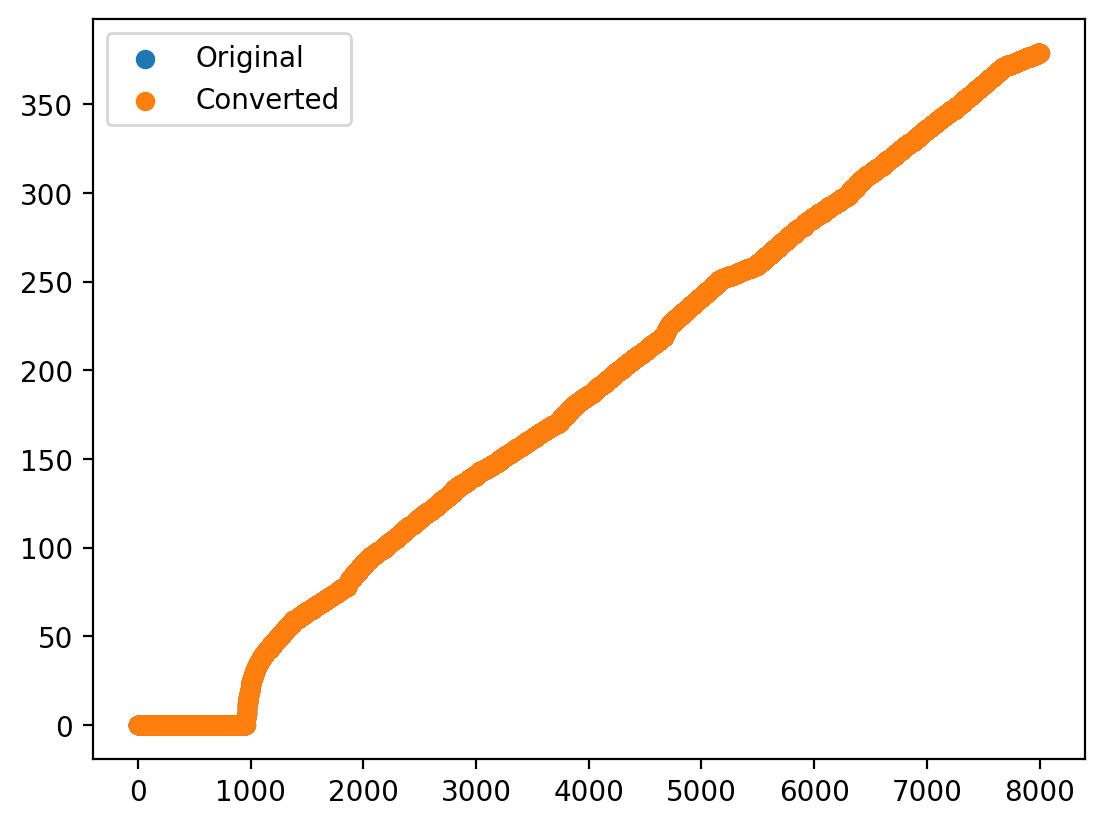

In [98]:
# i=-8000
# j=0
# plt.scatter(range(len(note_list_original[i:,j])), note_list_original[i:,j])
# plt.scatter(range(len(note_list_converted[i:,j])), note_list_converted[i:,j])
# plt.legend(["Original", "Converted"])
# plt.show()

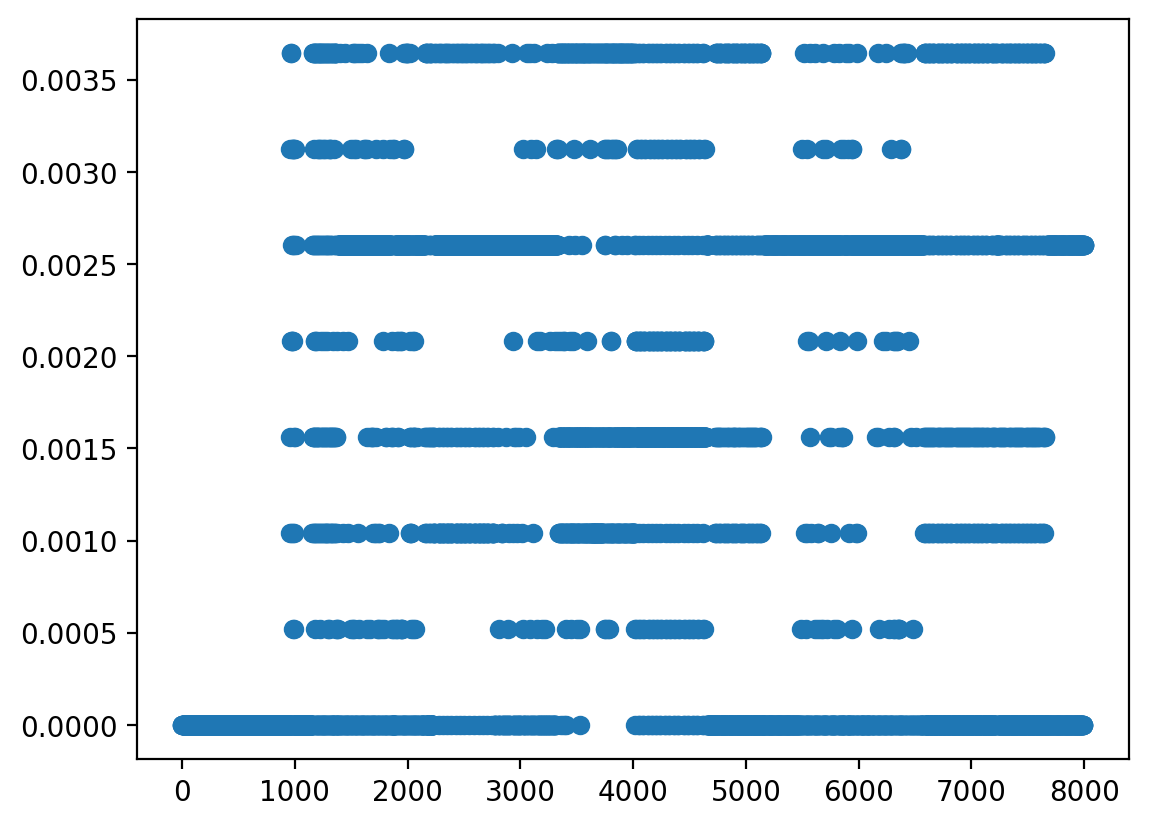

In [100]:
# diff = np.abs(note_list_original[:, 0] - note_list_converted[:, 0])
# plt.scatter(range(len(diff[i:])), diff[i:])

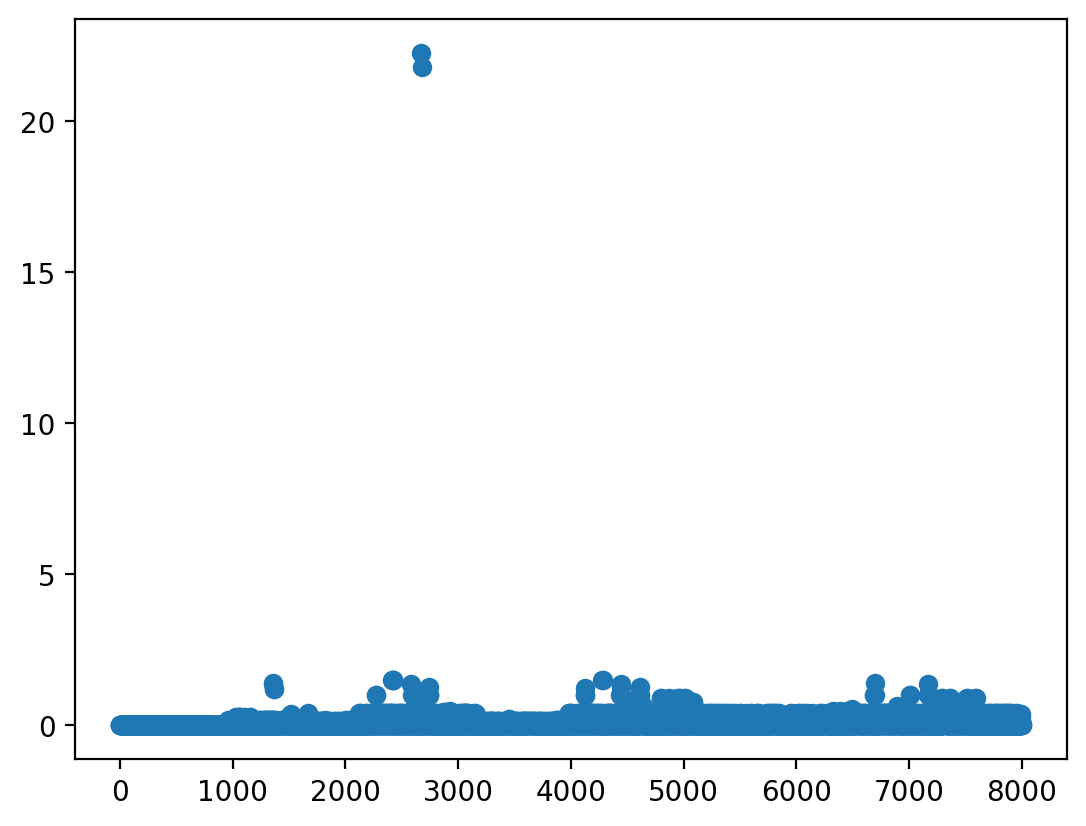

In [104]:
# diff = np.abs(note_list_original[:, 1] - note_list_converted[:, 1])
# plt.scatter(range(len(diff[i:])), diff[i:])

In [120]:
CREATE_WAV = True
if CREATE_WAV:
    path_original = os.path.join(ROOT_PATH, "data", "midi", "original.midi")
    path_converted = os.path.join(ROOT_PATH, "data", "midi", "converted.midi")

    muspy.outputs.write_midi(
        path=path_original,
        music=original_song,
        backend="pretty_midi",
    )

    muspy.outputs.write_midi(
        path=path_converted,
        music=converted_song,
        backend="pretty_midi",
    )

    path_wav_original = os.path.join(ROOT_PATH, "data", "wav", "original.wav")
    path_wav_converted = os.path.join(ROOT_PATH, "data", "wav", "converted.wav")

    # sounfont_path downloaded from https://www.dropbox.com/s/dl/4x27l49kxcwamp5/GeneralUser_GS_1.471.zip
    # from the download section of http://schristiancollins.com/generaluser.php
    # fluidsynth instead is installed by "brew install fluidsynth"

    soundfont_path = os.path.join(ROOT_PATH, "data", "GeneralUser GS 1.471", "GeneralUser GS v1.471.sf2")

    subprocess.run(["fluidsynth", "-F", path_wav_original, soundfont_path, path_original])
    subprocess.run(["fluidsynth", "-F", path_wav_converted, soundfont_path, path_converted])

FluidSynth runtime version 2.3.2
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file '/Users/marcelloceresini/github/MusicGeneration/data/wav/original.wav'..
FluidSynth runtime version 2.3.2
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file '/Users/marcelloceresini/github/MusicGeneration/data/wav/converted.wav'..


In [7]:
# for time_sign in converted_song["time_signatures"]:
#     print(type(time_sign["time"]))
#     print(type(time_sign["numerator"]))
#     print(type(time_sign["denominator"]))

In [8]:
# for time_sign in converted_song["key_signatures"]:
#     print(type(time_sign["time"]))
#     print(type(time_sign["mode"]))
#     print(type(time_sign["root"]))

In [9]:
for track in original_song.tracks:
    print(track.program)

35
26
73
52
73
30
27
0
78
53
65
56
56
52
81


In [10]:
converted_song.tracks[0].program

35

In [11]:
for s in [original_song, converted_song]:
    print(s.resolution)
    for n in s.time_signatures:
        print("time=",n.time/s.resolution, "num=",n.numerator, "den=",n.denominator)
    print("--------")

480
time= 0.0 num= 4 den= 4
time= 20.0 num= 3 den= 4
time= 23.0 num= 4 den= 4
--------
128
time= 0.0 num= 4 den= 4
time= 20.0 num= 3 den= 4
time= 23.0 num= 4 den= 4
--------


In [12]:
for i, t in enumerate(tmp_converted_song[:300]):
    print("i={:.0f} measure={:.0f} beat={:.0f} position={:.0f} duration={:.0f} t_sign={:.0f}".format(i, t[1], t[2], t[3], t[4], t[9])) if t[0] == 3 and t[6] == 26 else None

i=20 measure=0 beat=3 position=82 duration=96 t_sign=41
i=21 measure=0 beat=3 position=118 duration=96 t_sign=41
i=23 measure=1 beat=0 position=33 duration=95 t_sign=41
i=24 measure=1 beat=0 position=69 duration=94 t_sign=41
i=25 measure=1 beat=0 position=104 duration=93 t_sign=41
i=27 measure=1 beat=1 position=35 duration=91 t_sign=41
i=222 measure=10 beat=3 position=82 duration=56 t_sign=41
i=225 measure=10 beat=3 position=101 duration=55 t_sign=41
i=228 measure=10 beat=3 position=110 duration=55 t_sign=41
i=231 measure=10 beat=3 position=118 duration=55 t_sign=41
i=235 measure=11 beat=0 position=7 duration=55 t_sign=41
i=245 measure=11 beat=1 position=82 duration=56 t_sign=41
i=248 measure=11 beat=1 position=101 duration=55 t_sign=41
i=251 measure=11 beat=1 position=110 duration=55 t_sign=41
i=254 measure=11 beat=1 position=118 duration=55 t_sign=41
i=260 measure=11 beat=2 position=7 duration=55 t_sign=41
i=272 measure=11 beat=3 position=82 duration=56 t_sign=41
i=276 measure=11 bea

In [13]:
for t in tmp_converted_song[:30]:
    print(t)

[0 0 0 0 0 0 0 0 0 0 0]
[ 1  0  0  0  0  0 35  0  0  0  0]
[ 1  0  0  0  0  0 26  0  0  0  0]
[ 1  0  0  0  0  0 73  0  0  0  0]
[ 1  0  0  0  0  0 52  0  0  0  0]
[ 1  0  0  0  0  0 73  0  0  0  0]
[ 1  0  0  0  0  0 30  0  0  0  0]
[ 1  0  0  0  0  0 27  0  0  0  0]
[  1   0   0   0   0   0 128   0   0   0   0]
[ 1  0  0  0  0  0 78  0  0  0  0]
[ 1  0  0  0  0  0 53  0  0  0  0]
[ 1  0  0  0  0  0 65  0  0  0  0]
[ 1  0  0  0  0  0 56  0  0  0  0]
[ 1  0  0  0  0  0 56  0  0  0  0]
[ 1  0  0  0  0  0 52  0  0  0  0]
[ 1  0  0  0  0  0 81  0  0  0  0]
[2 0 0 0 0 0 0 0 0 0 0]
[4 0 0 0 0 0 0 0 7 0 0]
[ 5  0  0  0  0  0  0  0  0 41  0]
[ 6  0  0  0  0  0  0  0  0  0 33]
[ 3  0  3 82 96 42 26 59  7 41 33]
[  3   0   3 118  96  49  26  66   7  41  33]
[ 3  1  0  0  2 44  0 95  7 41 33]
[ 3  1  0 33 95 54 26 67  7 41 33]
[ 3  1  0 69 94 56 26 63  7 41 33]
[  3   1   0 104  93  61  26  78   7  41  33]
[ 3  1  1  0  2 44  0 74  7 41 33]
[ 3  1  1 35 91 66 26 69  7 41 33]
[ 3  1  2  0  2 44  

In [14]:
for i in range(1000000):
    

for s in [original_song, converted_song]:
    print(s.resolution)
    for i, n in enumerate(s.tracks[1].notes[:10]):
        print("time={:.2f} duration={:.2f} pitch={:.2f} velocity={:.2f}".format(n.time/s.resolution, n.duration/s.resolution, n.pitch, n.velocity))
    print("--------")

480
time=3.64 duration=8.64 pitch=42.00 velocity=59.00
time=3.92 duration=8.32 pitch=49.00 velocity=66.00
time=4.26 duration=7.98 pitch=54.00 velocity=67.00
time=4.54 duration=7.69 pitch=56.00 velocity=63.00
time=4.81 duration=7.44 pitch=61.00 velocity=78.00
time=5.28 duration=6.99 pitch=66.00 velocity=69.00
time=42.64 duration=1.57 pitch=47.00 velocity=82.00
time=42.79 duration=1.53 pitch=54.00 velocity=64.00
time=42.86 duration=1.52 pitch=59.00 velocity=95.00
time=42.92 duration=1.52 pitch=61.00 velocity=95.00
--------
128
time=3.64 duration=8.50 pitch=42.00 velocity=59.00
time=3.92 duration=8.50 pitch=49.00 velocity=66.00
time=4.26 duration=8.00 pitch=54.00 velocity=67.00
time=4.54 duration=7.75 pitch=56.00 velocity=63.00
time=4.81 duration=7.50 pitch=61.00 velocity=78.00
time=5.27 duration=7.00 pitch=66.00 velocity=69.00
time=42.64 duration=1.56 pitch=47.00 velocity=82.00
time=42.79 duration=1.50 pitch=54.00 velocity=64.00
time=42.86 duration=1.50 pitch=59.00 velocity=95.00
time=42

In [65]:
i = 2100

np.max(np.sum(np.abs(note_list_original - note_list_converted), axis=1))
np.argmax(np.sum(np.abs(note_list_original - note_list_converted), axis=1))
for i in range(2030, 2110):
    n = note_list_original[i,:]
    print("{:.5f} {:.5f} {:.0f} {:.0f}".format(n[0], n[1], n[2], n[3]))
    n = note_list_converted[i,:]
    print("{:.5f} {:.5f} {:.0f} {:.0f}".format(n[0], n[1], n[2], n[3]))
    print("---")


119.45833 0.45833 105 62
119.46094 0.45312 105 62
---
119.95833 0.45833 105 59
119.96094 0.45312 105 59
---
120.45833 0.45833 104 62
120.46094 0.45312 104 62
---
121.45833 0.45833 105 66
121.46094 0.45312 105 66
---
121.95833 0.45833 104 66
121.96094 0.45312 104 66
---
122.45833 0.45833 104 66
122.46094 0.45312 104 66
---
122.95833 0.45833 105 66
122.96094 0.45312 105 66
---
123.45833 0.45833 105 62
123.46094 0.45312 105 62
---
123.95833 0.45833 104 59
123.96094 0.45312 104 59
---
125.45833 0.45833 104 66
125.46094 0.45312 104 66
---
125.95833 0.45833 105 66
125.96094 0.45312 105 66
---
126.45833 0.45833 105 65
126.46094 0.45312 105 65
---
126.95833 0.45833 104 66
126.96094 0.45312 104 66
---
127.45833 0.45833 104 62
127.46094 0.45312 104 62
---
127.95833 0.45833 105 59
127.96094 0.45312 105 59
---
128.45833 0.45833 104 62
128.46094 0.45312 104 62
---
131.72500 0.22083 1 60
130.96094 4.50000 61 83
---
132.12083 0.29167 1 60
131.72656 0.21875 1 60
---
132.50833 0.34375 1 60
132.11719 0.

In [19]:
type(converted_song["resolution"])

int

In [3]:
# How to write the song to the json file

# with open("output.json", "w") as f:
#     json.dump(song_in_dict, f)

In [4]:
with open(path, "r") as f:
    tmp = json.load(f)

print(tmp.keys())

dict_keys(['metadata', 'resolution', 'tempos', 'time_signatures', 'tracks'])


In [7]:
# tmp["tempos"]

In [8]:
# tmp["metadata"]

In [9]:
# tmp["tracks"][0]

In [10]:
def find_drum_track(song):
    for track in song.tracks:
        if track.is_drum:
            return track
    return False

flag = False  
i = 0

for song in lmd_matched:
    if (track:=find_drum_track(song)):
        print(track)
        break

Track(program=0, is_drum=True, name='drums + fills       ', notes=[Note(time=6144, pitch=44, duration=32, velocity=64), Note(time=6192, pitch=44, duration=32, velocity=64), Note(time=6240, pitch=44, duration=32, velocity=64), ...])


In [11]:
print(lmd_matched[0].tracks[0])

Track(program=62, is_drum=False, name='main synth          ', notes=[Note(time=7, pitch=69, duration=64, velocity=100), Note(time=98, pitch=76, duration=70, velocity=100), Note(time=194, pitch=74, duration=70, velocity=100), ...])


In [12]:
for song in lmd_matched:
    if song.key_signatures != []:
        print(song.key_signatures)
        break

[KeySignature(time=0, root=9, mode='minor')]


In [13]:
print(lmd_matched[0].tempos)


[Tempo(time=0, qpm=120.0)]
